In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Save figs for latex
import matplotlib as mpl
import tikzplotlib as tikz
from options import *

# print(mpl.rcParams.keys())

## Expérience 5: Puissance en fonction de l'inclinaison

### Intensité de sortie

In [3]:
amorphe = np.loadtxt("../data/Igamma(theta),amorphe,d=42cm.csv", dtype=float, skiprows=1, delimiter=",")
amorphe

array([[ 0.  , 13.91],
       [ 5.  , 13.76],
       [10.  , 13.41],
       [15.  , 12.77],
       [20.  , 12.3 ],
       [25.  , 11.67],
       [30.  , 10.96],
       [35.  , 10.16],
       [40.  ,  9.25],
       [45.  ,  8.37],
       [50.  ,  7.35],
       [55.  ,  6.4 ],
       [60.  ,  5.48],
       [65.  ,  4.52],
       [70.  ,  3.66],
       [75.  ,  2.9 ],
       [80.  ,  2.3 ],
       [85.  ,  1.81],
       [90.  ,  1.45]])

[6.22265475 0.03177023 7.44308886]


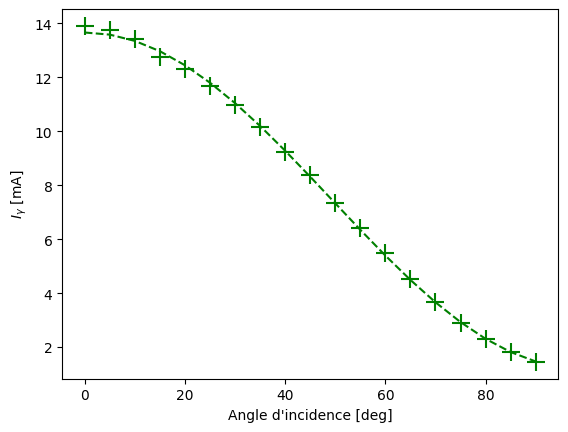

In [25]:
f = lambda x, a, b, c: c + a * np.cos(b * x)
params, _ = sp.optimize.curve_fit(f, amorphe[:,0], amorphe[:,1], p0=[14, 0.03, 7])
print(params)
plt.plot(amorphe[:,0], f(amorphe[:,0], *params), '--', color=colors["A"])

plt.scatter(amorphe[:,0], amorphe[:,1], marker='+', color=colors["A"], s=markersize)
plt.xlabel("Angle d'incidence [deg]")
plt.ylabel("$I_{\gamma}$ [mA]")
tikz.save("../plots/Igamma(theta),A.tikz")

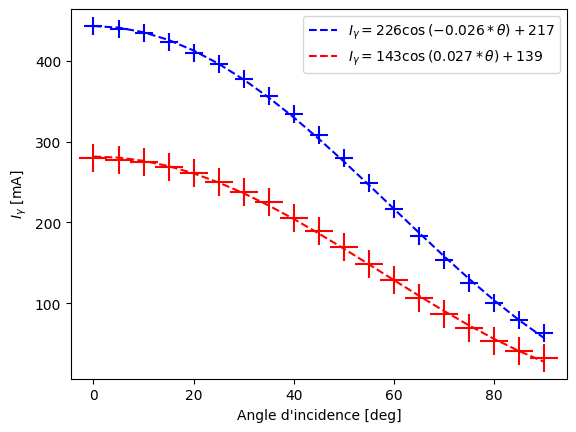

In [27]:
# Mono
mono = np.loadtxt("../data/Igamma(theta),monocristallin,d=42cm.csv", dtype=float, skiprows=1, delimiter=",")
f = lambda x, a, b, c: c + a * np.cos(b * x)
params, _ = sp.optimize.curve_fit(f, mono[:,0], mono[:,1], p0=[14, 0.03, 7])
plt.plot(mono[:,0], f(mono[:,0], *params), '--', color=colors["M"], label="$I_{{\gamma}} = {:.0f}\cos{{({:.3f} * \\theta)}} + {:.0f}$".format(*params))
plt.scatter(mono[:,0], mono[:,1], marker='+', color=colors["M"], s=markersize)

# Poly
poly = np.loadtxt("../data/Igamma(theta),polycristallin,d=42cm.csv", dtype=float, skiprows=1, delimiter=",")
f = lambda x, a, b, c: c + a * np.cos(b * x)
params, _ = sp.optimize.curve_fit(f, poly[:,0], poly[:,1], p0=[14, 0.03, 7])
plt.plot(poly[:,0], f(poly[:,0], *params), '--', color=colors["P"], label="$I_{{\gamma}} = {:.0f}\cos{{({:.3f} * \\theta)}} + {:.0f}$".format(*params))
plt.scatter(poly[:,0], poly[:,1], marker='+', color=colors["P"], s=markersize)

plt.legend()
plt.xlabel("Angle d'incidence [deg]")
plt.ylabel("$I_{\gamma}$ [mA]")
tikz.save("../plots/Igamma(theta),MP.tikz")